<p align="center">
    <img src="smarkio.png">
</p>

Smarkio – Desafio Prático Ciência de Dados

Mauricio Eloy


# Datasets

1. Primeira aba - Análise_ML:

    a. pred_class - A classe que foi identificada pelo modelo;

    b. probabilidade - A probabilidade da classe que o modelo identificou;

    c. status - status da classificação de acordo com um especialista (approved);

    d. true_class - A classe verdadeira (se nula, assumir o pred_class);

    Obs: Se pred_class é igual a true_class, temos que o modelo acertou.

2. Segunda aba - NLP:

    a. letra - trecho de música;

    b. artista - cantora referente a letra.


# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pdpf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import (train_test_split, StratifiedKFold)
from sklearn.linear_model import (LinearRegression, 
                                  LogisticRegression, 
                                  SGDClassifier, 
                                  RidgeClassifier)
from sklearn.naive_bayes import (GaussianNB, MultinomialNB)
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier,
                             BaggingClassifier,
                             ExtraTreesClassifier,
                             AdaBoostClassifier,
                             VotingClassifier)
from sklearn import impute
from sklearn.experimental import enable_iterative_imputer 
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import (ClassifierChain, BinaryRelevance)
from skmultilearn.adapt import MLkNN
from sklearn.neural_network import MLPClassifier

from sklearn.feature_extraction.text import (CountVectorizer,
                                             TfidfVectorizer)
from sklearn.metrics import (
    average_precision_score,
    recall_score,
    precision_score,
    balanced_accuracy_score,
    accuracy_score,
    f1_score,
    classification_report,
    auc,
    confusion_matrix,
    roc_auc_score,
    hamming_loss,
    roc_curve)

import xgboost

from yellowbrick.classifier import (ConfusionMatrix, ROCAUC)
from yellowbrick.model_selection import (LearningCurve, ValidationCurve)

import pickle

# Dataset "Análise_ML"

## Dados

In [2]:
df_analise_ml = pd.read_excel('teste_smarkio_lbs.xls', sheet_name = "Análise_ML")

### Análise Exploratória dos Dados

In [3]:
# verificando os 5 primeiros 
df_analise_ml.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


In [4]:
# verificando o tipo dos dados
df_analise_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    object 
 3   True_class     181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.2+ KB


#### Trocando 0 pela classe correta em 'true_class'

Conforme descrição:

* "d. true_class - A classe verdadeira (se nula, assumir o pred_class);

In [5]:
for i in range(len(df_analise_ml)):
    if df_analise_ml.True_class[i] == 0:
        df_analise_ml.True_class[i] = df_analise_ml.Pred_class[i]

In [6]:
# verificando o resultado
df_analise_ml.sample(20)

,Pred_class,probabilidade,status,True_class
527,76,1.000000,approved,NaN
39,60,0.402339,approved,3.0
23,11,0.263713,approved,79.0
28,24,0.738060,approved,NaN
178,2,0.834910,approved,NaN
24,11,1.000000,approved,NaN
97,108,1.000000,approved,NaN
251,3,0.617418,approved,40.0
486,52,0.328479,approved,NaN
139,96,0.591297,approved,NaN


#### Análise geral por meio do 

In [7]:
pdpf.ProfileReport(df_analise_ml)

#### Análise da varíavel 'status'

A variável 'status', a única não numérica, apresenta apenas dois valores possíves: 'approved' e 'revision', dos quais a maior frequência é da variável 'approved' com $93.3 \%$ dos casos.

Um ponto importante da variável é que não apresenta dados ausentes.

#### Análise da varíavel 'True_class'

In [8]:
df_analise_ml.isnull().sum()

Pred_class         0
probabilidade      0
status             0
True_class       462
dtype: int64

A variável em questão é a única com dados ausentes.

Estes dados representam uma parcela significativa no total de informações fornecidas, cerca de $71.9\$%.

Os valores mais comuns nesta variável são:

Valor | Contagem | Porcentagem
:-----: | :--------: | :-----------:
74 | 23 | 3.6
2 | 16 | 2.5
52 | 14 |2.2
3 | 12| 1.9

#### Relação da variável 'status' e da varíavel 'True_class'

Sabe-se que temos que tomar uma atitude em relação aos dados ausentes na variável 'True_class'.

Pode-se simplesmente excluí-los da base de dados ou completar os valores ausentes utilizando-se de um critério específico.

Antes de decidir deve-se investigar se a exclusão trará prejuízo significativo para a construção do modelo.

In [9]:
df_apenas_revision = df_analise_ml[df_analise_ml['status']=='revision']
print(len(df_apenas_revision))
df_apenas_revision

43


,Pred_class,probabilidade,status,True_class
600,2,0.752448,revision,NaN
601,24,0.817525,revision,NaN
602,24,0.909148,revision,NaN
603,25,0.509871,revision,NaN
604,25,0.629700,revision,NaN
605,25,0.633426,revision,NaN
606,32,0.621226,revision,NaN
607,55,0.740292,revision,NaN
608,77,0.403734,revision,NaN
609,77,0.419723,revision,NaN


Quando o filtro em recision em 'status' é realizado percebe-se que todos neste estado estão com dados ausentes para a variável 'True_class', deste modo, fica inviável excluir as linhas com dados ausentes.

Mais adiante o completamento dos valores ausentes será realizado.

## Desempenho do modelo comparando 'pred_class' e 'true_class'

In [10]:
df_des_modelo = df_analise_ml.copy().dropna()
df_des_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 599
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     181 non-null    int64  
 1   probabilidade  181 non-null    float64
 2   status         181 non-null    object 
 3   True_class     181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.1+ KB


In [11]:
y_pred = df_des_modelo.Pred_class
y_true = df_des_modelo.True_class

labels = y_true.unique()

#### Métricas

In [12]:
print('accuracy_score',accuracy_score(y_pred, y_true))
print('balanced_accuracy_score',balanced_accuracy_score(y_pred, y_true))
print('hamming_loss',hamming_loss(y_pred, y_true))
print('precision_score', precision_score(y_pred, y_true, labels=labels, average='macro'))
print('recall_score',recall_score(y_pred, y_true, labels=labels, average='macro'))
print('f1_score',f1_score(y_pred, y_true, labels=labels, average='macro'))

accuracy_score 0.2983425414364641
balanced_accuracy_score 0.2712572920906254
hamming_loss 0.7016574585635359
precision_score 0.3509594739667204
recall_score 0.27125729209062543
f1_score 0.27776624609957945


#### Conclusão

Ao avaliar as $6$ métricas acima concluí-se que o modelo é **ruim**, visto que:

1. As métricas (```accuracy_score```, ```balanced_accuracy_score```, ```precision_score```, ```recall_score``` e ```f1_score```) onde o melhor é o quanto mais próximo de $1$, estão mais próximas de $0$ do que de $1$; 

2. A métrica (```hamming_loss```) onde o melhor é o quanto mais próximo de $0$, esta mais próximas de $1$ do que de $0$.

## Criando Classificador

### Trocando as variáveis 'approved' e 'revision' por números

In [13]:
df_analise_ml['status'] = df_analise_ml['status'].map({'approved':1,
                                                      'revision':0})
df_analise_ml.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,1,2.0
1,2,0.379377,1,74.0
2,2,0.379377,1,74.0
3,2,0.420930,1,74.0
4,2,0.607437,1,NaN


### Preenchendo 'NaN' 

In [14]:
y = df_analise_ml['status']
X = df_analise_ml.drop(columns=[
    "status"])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, 
                                                                    random_state=42)

In [15]:
imputer = impute.IterativeImputer()
imputed = imputer.fit_transform(X_train)
X_train.loc[:, :] = imputed
imputed = imputer.transform(X_test)
X_test.loc[:, :] = imputed

In [16]:
X = pd.concat([X_train,X_test])
X.isnull().sum()

Pred_class       0
probabilidade    0
True_class       0
dtype: int64

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 234 to 271
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    float64
 1   probabilidade  643 non-null    float64
 2   True_class     643 non-null    float64
dtypes: float64(3)
memory usage: 20.1 KB


In [18]:
X.True_class = X.True_class.astype(int)
X.Pred_class = X.Pred_class.astype(int)
X

,Pred_class,probabilidade,True_class
234,2,0.623210,52
428,2,0.969559,52
210,60,0.580529,57
9,2,1.000000,52
518,74,0.443712,58
...,...,...,...
546,92,0.834073,4
277,17,0.964834,53
310,52,0.057740,52
137,74,1.000000,58


In [19]:
df_mod = X.join(y)
df_mod

,Pred_class,probabilidade,True_class,status
234,2,0.623210,52,1
428,2,0.969559,52,1
210,60,0.580529,57,1
9,2,1.000000,52,1
518,74,0.443712,58,1
...,...,...,...,...
546,92,0.834073,4,1
277,17,0.964834,53,1
310,52,0.057740,52,1
137,74,1.000000,58,1


### Construindo dataset para criação do modelo

In [20]:
df_mod['correta'] = 0
df_mod['status_correto'] = 0

In [21]:
for i in range(len(df_mod)):
    if df_mod['Pred_class'][i] == df_mod['True_class'][i]:
        df_mod['correta'][i] = 1
    else:
        df_mod['correta'][i] = 0
        
for i in range(len(df_mod)):
    if df_mod['status'][i] == df_mod['correta'][i]:
        df_mod['status_correto'][i] = 1
    else:
        df_mod['status_correto'][i] = 0
        
df_mod

,Pred_class,probabilidade,True_class,status,correta,status_correto
234,2,0.623210,52,1,0,0
428,2,0.969559,52,1,0,0
210,60,0.580529,57,1,0,0
9,2,1.000000,52,1,0,0
518,74,0.443712,58,1,0,0
...,...,...,...,...,...,...
546,92,0.834073,4,1,0,0
277,17,0.964834,53,1,0,0
310,52,0.057740,52,1,1,1
137,74,1.000000,58,1,0,0


In [22]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 234 to 271
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pred_class      643 non-null    int64  
 1   probabilidade   643 non-null    float64
 2   True_class      643 non-null    int64  
 3   status          643 non-null    int64  
 4   correta         643 non-null    int64  
 5   status_correto  643 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 55.2 KB


In [23]:
df_mod.correta.value_counts()

0    586
1     57
Name: correta, dtype: int64

In [24]:
df_mod.status_correto.value_counts()

0    543
1    100
Name: status_correto, dtype: int64

### Modelo

#### Criação

In [25]:
y = df_mod['status_correto']
X = df_mod.drop(columns=["status_correto"])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size = 0.3,
                                                                    stratify=y,
                                                                    random_state = 123)

In [26]:
classificador = RandomForestClassifier()
classificador.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Avaliação

In [27]:
X_revision = X[X['status']==0]
y_revision_test = df_mod[df_mod['status']==0]['status_correto']
display(X_revision.head())
display(y_revision_test.head())

,Pred_class,probabilidade,True_class,status,correta
628,3,0.351031,52,0,0
617,4,0.405327,52,0,0
635,36,0.285545,54,0,0
642,96,0.340740,60,0,0
633,17,0.506654,53,0,0


628    1
617    1
635    1
642    1
633    1
Name: status_correto, dtype: int64

In [28]:
y_predicted = classificador.predict(X_revision)

In [29]:
print('accuracy_score',accuracy_score(y_predicted, y_revision_test))
print('balanced_accuracy_score',balanced_accuracy_score(y_predicted, y_revision_test))
print('hamming_loss',hamming_loss(y_predicted, y_revision_test))
print('precision_score', precision_score(y_predicted, y_revision_test, labels=labels, average='macro'))
print('recall_score',recall_score(y_predicted, y_revision_test, labels=labels, average='macro'))
print('f1_score',f1_score(y_predicted, y_revision_test, labels=labels, average='macro'))

accuracy_score 1.0
balanced_accuracy_score 1.0
hamming_loss 0.0
precision_score 0.0
recall_score 0.0
f1_score 0.0


#### Conclusão

Não pode-se utilizar a falsa ilusão das métricas anteriores para validar o modelo, uma vez que, utilizou-se de "vazamento de informações" para treinar o modelo, e deste modo, o modelo teve este comportamento.

# Dataset "NLP"

Realizou-se duas abordagens básicas, apenas para o início do projeto:

1. Construir um preditor de classes:

    a. utilizar algoritmos de classificação supervisionados;
    
    b. utilizar os algoritimos no seu modo "default";
    
    c. comparar os modelos através de algumas métricas;
    
    d. escolher o melhor modelo em seu formato "default".
    
2. Construir um preditor multilabel:

    a. neste caso em específico temos apenas letras de músicas de artistas individuais, mas poderíamos ter músicas com a participação de mais de um artista e deste modo, deveríamos fazer a classificação multilabel;
    
    b. utilizar algoritmos de classificação supervisionados;
    
    c. utilizar os algoritimos no seu modo "default";
    
    d. comparar os modelos através de duas métricas;
    
    e. escolher o melhor modelo em seu formato "default".
    
3. Escolher a melhor abordagem:

    a. treinar o modelo;
    
    b. salvar o modelo treinado;
    
    c. realizar algumas predições.
    
4. OBSERVAÇÃO: vale ressaltar que este é apenas um trabalho inicial, deve-se ainda: 
 
     a. melhorar a estrutura dos dados de entrada no modelo, utilizando-se de técnicas de PNL para "faxinar" os dados;
     
     b. fazer stacking de modelos para verificar se obtemos uma melhora significativa;
     
     c. obter os melhores hiperparâmetros dos melhores modelos para verificar se obtemos uma melhora significativa.

## Preditor de Classes

### Dados

In [30]:
df_nlp = pd.read_excel('teste_smarkio_lbs.xls', sheet_name="NLP")
df_nlp.sample(20)

,letra,artista
343,"Mama, I found a man Who loves me and understan...",Rihanna
124,[Verse 1:] He's always laughing And flirting w...,Beyoncé
311,"I came fluttering in from Neverland No, no, n...",Rihanna
231,[P. Diddy - talking] Yeah There's three things...,Beyoncé
283,(trecho) You're my sunrise My baby brown eyes...,Rihanna
224,My body is magnified In the sun set me alight ...,Beyoncé
287,[Rick Ross] Rick Rozay Rihanna Rich forever St...,Rihanna
330,Why do you call When I'm not feelin' you (baby...,Rihanna
97,I wish I could look in your eyes And tell you ...,Beyoncé
222,"Yeah, yeah and the wind is talking Yeah, yeah ...",Beyoncé


In [31]:
df_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   letra    518 non-null    object
 1   artista  518 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB


In [32]:
df_nlp.artista.unique()

array(['Beyoncé', 'Rihanna'], dtype=object)

In [33]:
df_nlp.artista.value_counts()

Beyoncé    274
Rihanna    244
Name: artista, dtype: int64

In [34]:
df_nlp['target'] = df_nlp['artista'].map({'Rihanna' : 0,'Beyoncé' : 1})
y = df_nlp.target
df_nlp.sample(20)

,letra,artista,target
379,"Kiss it, kiss it better, baby Kiss it, kiss it...",Rihanna,0
517,[Rihanna] I remember when the world was just m...,Rihanna,0
154,I've been watching for the signs Took a trip t...,Beyoncé,1
489,Yellow diamonds in the light And we're standin...,Rihanna,0
103,Recuerde que esos muros que construí Así que s...,Beyoncé,1
485,You can say that I'm not perfect If you tell m...,Rihanna,0
50,"Oh killing me softly And I'm still falling, st...",Beyoncé,1
342,"[Rihanna] I came to win, to fight, to conquer,...",Rihanna,0
384,"Aw, Aw, Aw, Rihanna Ey, Ey Dreamer Aw, Aw, Ey,...",Rihanna,0
270,I said yes to your number And yes to you datin...,Beyoncé,1


In [35]:
def vetorizador_transform(X, metodo, max_features, max_df):
    vetorizar = metodo(max_features=max_features,max_df=max_df, stop_words='english')
    X_df = pd.DataFrame.sparse.from_spmatrix(vetorizar.fit_transform(X), 
                                                    columns=vetorizar.get_feature_names())
    return X_df

In [36]:
#modelos a serem utilizados no modo default
models = [LogisticRegression,
         SGDClassifier,
         RidgeClassifier,
         KNeighborsClassifier,
         MultinomialNB,
         SVC,
         RandomForestClassifier,
         GradientBoostingClassifier,
         BaggingClassifier,
         ExtraTreesClassifier,
         AdaBoostClassifier,
         xgboost.XGBClassifier,
         MLPClassifier]

#metricas iniciais
scores = ['accuracy','precision','recall','f1']

In [37]:
colunas_scoring = ['model','AUC']

for i in range(len(scores)):
        colunas_scoring.extend(['avg_'+scores[i],'std_'+scores[i]])
        
colunas_scoring

['model',
 'AUC',
 'avg_accuracy',
 'std_accuracy',
 'avg_precision',
 'std_precision',
 'avg_recall',
 'std_recall',
 'avg_f1',
 'std_f1']

In [38]:
def best_scores(df_scoring,score):
    print("Máximo ===", score)
    best_score = df_scoring['avg_'+score].max()
    return display(df_scoring[df_scoring['avg_'+score]==best_score])

In [39]:
def comparar_modelos(lista_modelos, X, X_train,X_test, y, y_train, y_test, lista_scores):

    scoring = pd.DataFrame(columns=colunas_scoring)
    scoring['model'] = lista_modelos
    models_names = []
    lista_auc = []

    cont_models = 0
    for model in lista_modelos:  
        models_names.append(model.__name__) 
        cls = model()
        kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        cont_scores = 0
        for score in lista_scores:
            s = model_selection.cross_val_score(cls, X, y, scoring=score, cv=kfold)       
            scoring['avg_' + scores[cont_scores]][cont_models] = s.mean()
            scoring['std_' + scores[cont_scores]][cont_models] = s.std()
            cont_scores += 1

        print('====='+ model.__name__+' default'+'=====')
        cls.fit(X_train, y_train)
        y_predicted = cls.predict(X_test)
        roc_auc = roc_auc_score(y_test,y_predicted)
        lista_auc.append(roc_auc)
        print(classification_report(y_test,
                                   y_predicted,
                                   target_names=["Rihanna", "Beyoncé"]))
        fpr, tpr, thresold = roc_curve(y_test, y_predicted)
        
        plt.plot(fpr, tpr, lw = 1)
        plt.plot([0,1],[0,1], '--', color=(0.6, 0.6, 0.6), label="sorte")
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])
        plt.xlabel("Taxa de positivos falsos", fontsize=15)
        plt.ylabel("Taxa de positivos verdadeiros", fontsize=15)
        plt.title("Curva ROC", fontsize=12)        
        plt.show()
        
        mapping = {0: "Rihanna", 1: "Beyoncé"}
        fig, ax = plt.subplots(figsize=(6, 6))
        cm_viz = ConfusionMatrix(cls, classes=["Rihanna", "Beyoncé"], label_encoder=mapping)
        cm_viz.score(X_test, y_test)
        cm_viz.poof()

        cont_models += 1

    scoring['model'] = models_names
    scoring['AUC'] = lista_auc
        
    for i in range(len(scores)):
        best_scores(scoring,scores[i])
    
    print("====Resumo de Métricas (cross_val_score)====")    
    return scoring

### Análise de diferentes vetorizações

#### CountVectorizer

In [40]:
X_cvec = vetorizador_transform(df_nlp.letra,CountVectorizer, 4000, 0.85)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_cvec,
                                                                    y,
                                                                    test_size = 0.3,
                                                                    stratify=y,
                                                                    random_state = 123)

=====LogisticRegression default=====
              precision    recall  f1-score   support

     Rihanna       0.66      0.58      0.61        73
     Beyoncé       0.66      0.73      0.70        83

    accuracy                           0.66       156
   macro avg       0.66      0.66      0.66       156
weighted avg       0.66      0.66      0.66       156



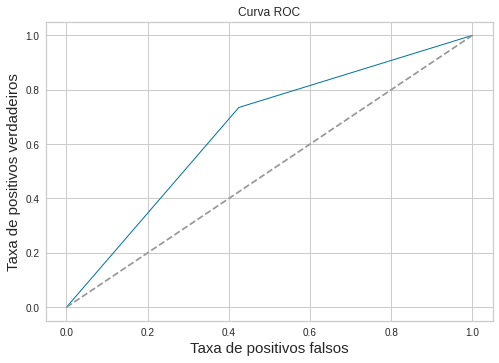

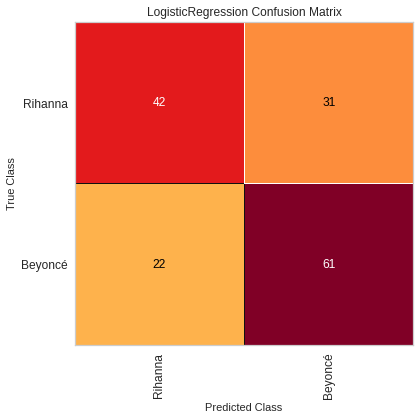

=====SGDClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.64      0.71      0.68        73
     Beyoncé       0.72      0.65      0.68        83

    accuracy                           0.68       156
   macro avg       0.68      0.68      0.68       156
weighted avg       0.68      0.68      0.68       156



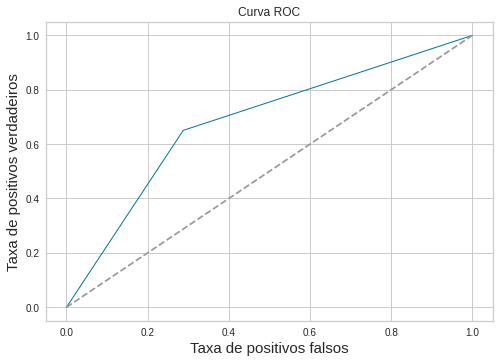

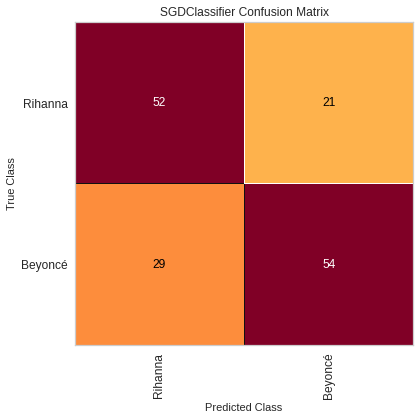

=====RidgeClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.61      0.53      0.57        73
     Beyoncé       0.63      0.70      0.66        83

    accuracy                           0.62       156
   macro avg       0.62      0.62      0.62       156
weighted avg       0.62      0.62      0.62       156



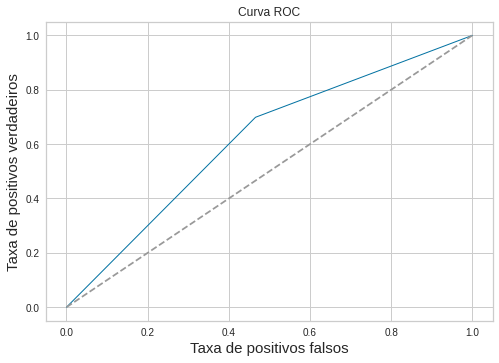

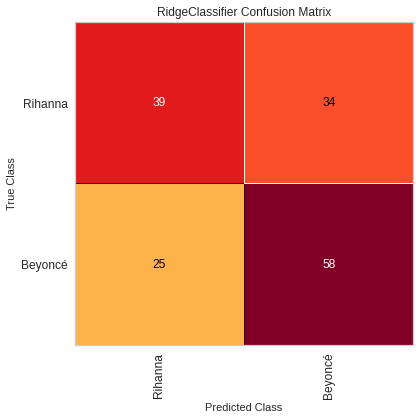

=====KNeighborsClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.63      0.37      0.47        73
     Beyoncé       0.59      0.81      0.68        83

    accuracy                           0.60       156
   macro avg       0.61      0.59      0.57       156
weighted avg       0.61      0.60      0.58       156



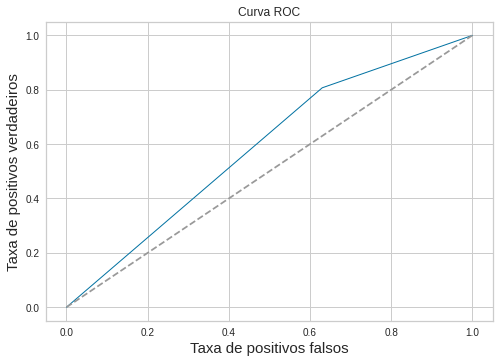

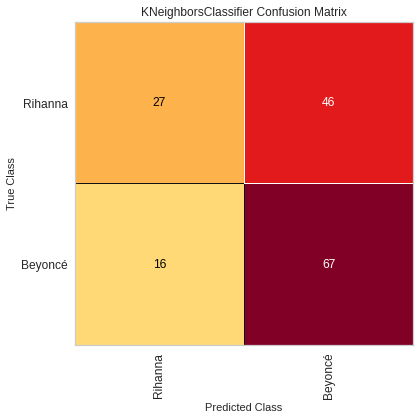

=====MultinomialNB default=====
              precision    recall  f1-score   support

     Rihanna       0.68      0.56      0.62        73
     Beyoncé       0.67      0.77      0.72        83

    accuracy                           0.67       156
   macro avg       0.68      0.67      0.67       156
weighted avg       0.67      0.67      0.67       156



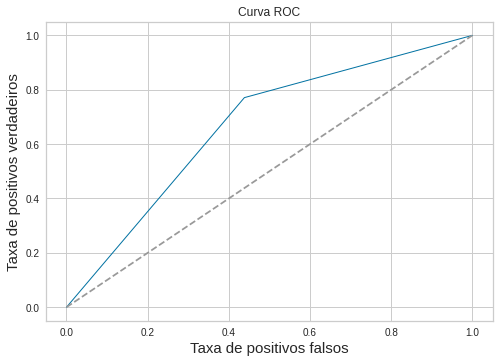

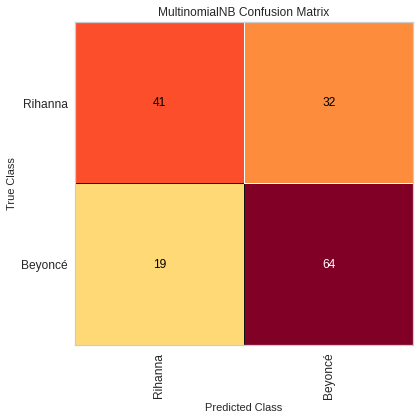

=====SVC default=====
              precision    recall  f1-score   support

     Rihanna       0.67      0.36      0.46        73
     Beyoncé       0.60      0.84      0.70        83

    accuracy                           0.62       156
   macro avg       0.63      0.60      0.58       156
weighted avg       0.63      0.62      0.59       156



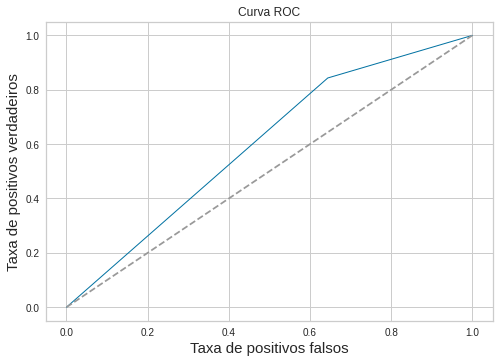

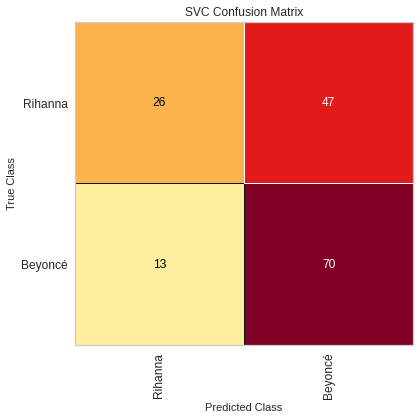

=====RandomForestClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.73      0.59      0.65        73
     Beyoncé       0.69      0.81      0.74        83

    accuracy                           0.71       156
   macro avg       0.71      0.70      0.70       156
weighted avg       0.71      0.71      0.70       156



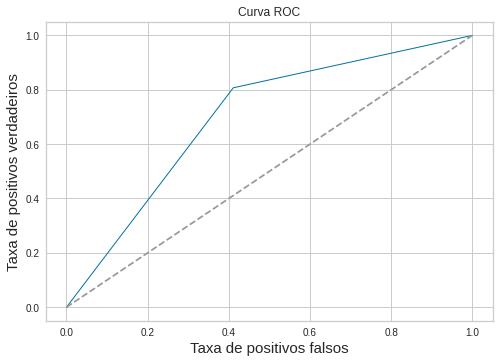

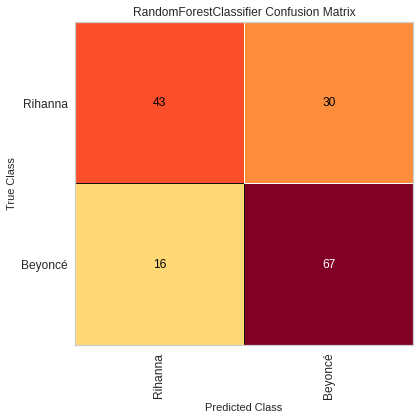

=====GradientBoostingClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.66      0.42      0.52        73
     Beyoncé       0.61      0.81      0.70        83

    accuracy                           0.63       156
   macro avg       0.64      0.62      0.61       156
weighted avg       0.64      0.63      0.61       156



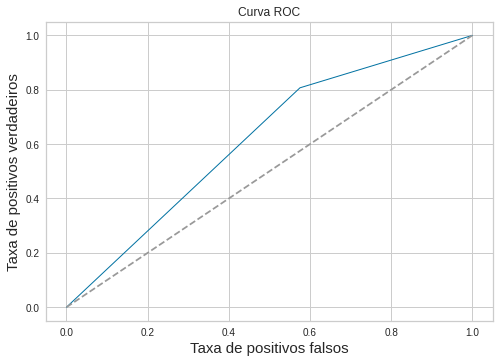

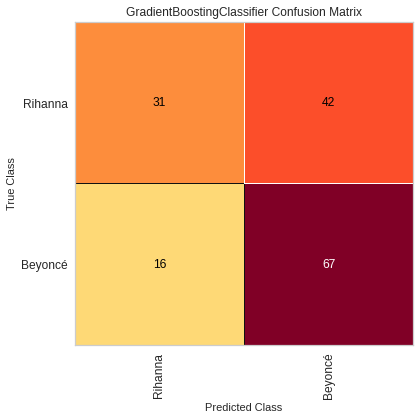

=====BaggingClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.72      0.59      0.65        73
     Beyoncé       0.69      0.80      0.74        83

    accuracy                           0.70       156
   macro avg       0.70      0.69      0.69       156
weighted avg       0.70      0.70      0.69       156



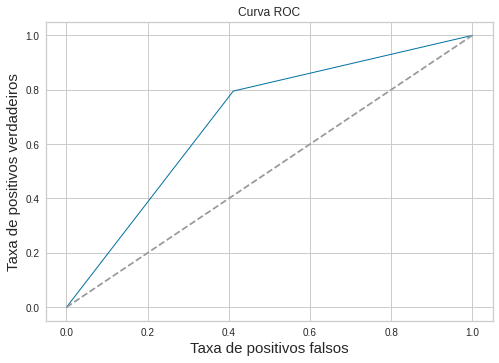

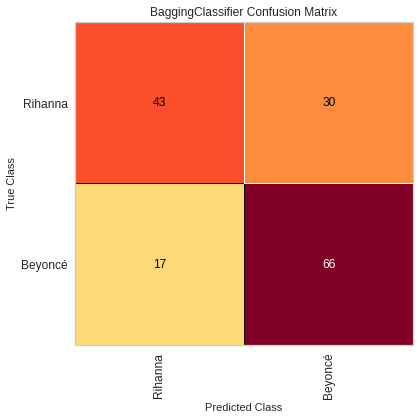

=====ExtraTreesClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.69      0.52      0.59        73
     Beyoncé       0.65      0.80      0.72        83

    accuracy                           0.67       156
   macro avg       0.67      0.66      0.66       156
weighted avg       0.67      0.67      0.66       156



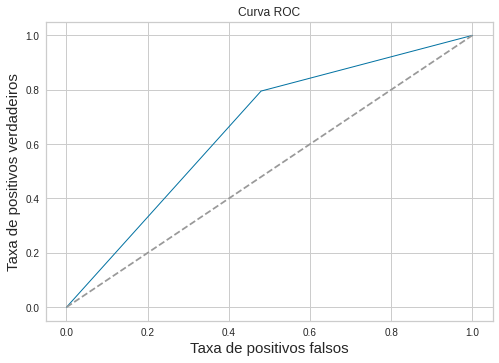

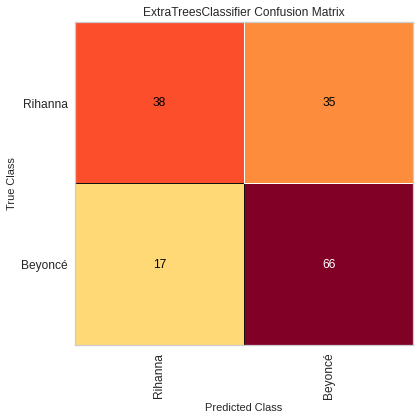

=====AdaBoostClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.76      0.52      0.62        73
     Beyoncé       0.67      0.86      0.75        83

    accuracy                           0.70       156
   macro avg       0.71      0.69      0.68       156
weighted avg       0.71      0.70      0.69       156



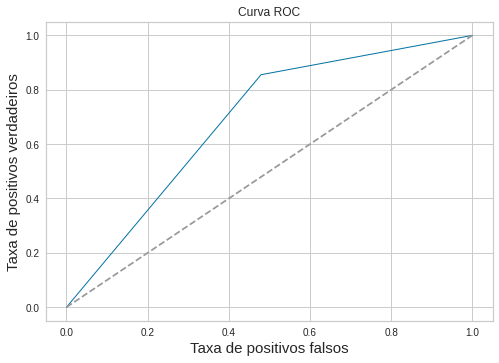

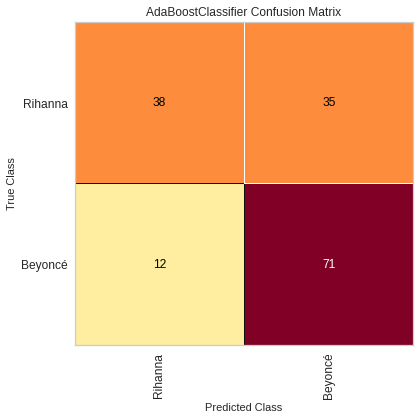

=====XGBClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.74      0.51      0.60        73
     Beyoncé       0.66      0.84      0.74        83

    accuracy                           0.69       156
   macro avg       0.70      0.68      0.67       156
weighted avg       0.70      0.69      0.68       156



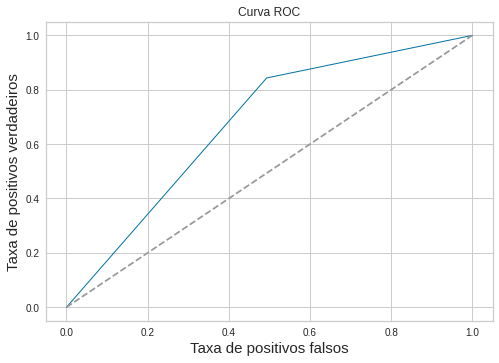

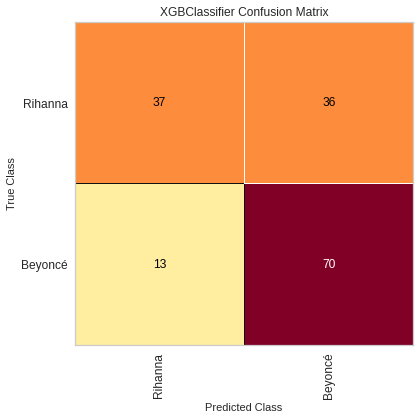

=====MLPClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.70      0.51      0.59        73
     Beyoncé       0.65      0.81      0.72        83

    accuracy                           0.67       156
   macro avg       0.67      0.66      0.65       156
weighted avg       0.67      0.67      0.66       156



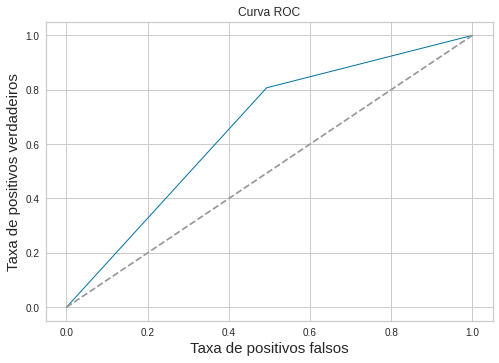

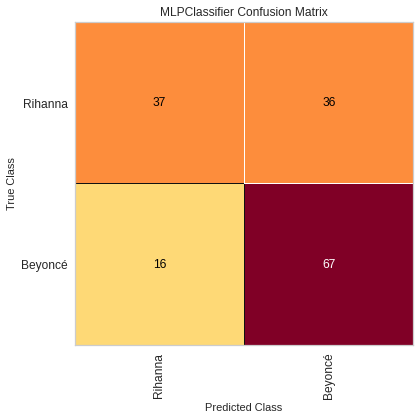

Máximo === accuracy


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
9,ExtraTreesClassifier,0.657864,0.714358,0.064744,0.70565,0.0678368,0.784444,0.0403616,0.737863,0.041186


Máximo === precision


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
4,MultinomialNB,0.666364,0.696863,0.0306945,0.730037,0.051838,0.686128,0.0404547,0.70549,0.0255476


Máximo === recall


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
5,SVC,0.599769,0.635157,0.0500956,0.616851,0.0393246,0.832256,0.0347297,0.707779,0.0318806


Máximo === f1


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
6,RandomForestClassifier,0.698135,0.706553,0.051542,0.704869,0.052264,0.780943,0.0263829,0.75517,0.0438091


====Resumo de Métricas (cross_val_score)====


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
0,LogisticRegression,0.655141,0.679556,0.0161159,0.681925,0.016167,0.740875,0.0506161,0.709035,0.0227297
1,SGDClassifier,0.681466,0.683308,0.0557825,0.685453,0.0211946,0.682694,0.0358978,0.708024,0.0423006
2,RidgeClassifier,0.616521,0.625579,0.0282211,0.637025,0.0239712,0.678923,0.0516326,0.656585,0.0330547
3,KNeighborsClassifier,0.588546,0.606367,0.0509572,0.607988,0.0384369,0.726734,0.0897908,0.659755,0.0494716
4,MultinomialNB,0.666364,0.696863,0.0306945,0.730037,0.051838,0.686128,0.0404547,0.70549,0.0255476
5,SVC,0.599769,0.635157,0.0500956,0.616851,0.0393246,0.832256,0.0347297,0.707779,0.0318806
6,RandomForestClassifier,0.698135,0.706553,0.051542,0.704869,0.052264,0.780943,0.0263829,0.75517,0.0438091
7,GradientBoostingClassifier,0.615943,0.675635,0.0446305,0.6549,0.0454535,0.824781,0.0248973,0.726582,0.0295204
8,BaggingClassifier,0.692111,0.679425,0.0591502,0.689773,0.0698595,0.766397,0.061358,0.67407,0.060762
9,ExtraTreesClassifier,0.657864,0.714358,0.064744,0.70565,0.0678368,0.784444,0.0403616,0.737863,0.041186


In [41]:
comparar_modelos(models, X_cvec, X_train,X_test, y, y_train, y_test, scores)

#### TfidfVectorizer

In [42]:
X_tfidfv = vetorizador_transform(df_nlp.letra,TfidfVectorizer, 4000, 0.85)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_tfidfv,
                                                                    y,
                                                                    test_size = 0.3,
                                                                    stratify=y,
                                                                    random_state = 123)

=====LogisticRegression default=====
              precision    recall  f1-score   support

     Rihanna       0.71      0.48      0.57        73
     Beyoncé       0.64      0.83      0.73        83

    accuracy                           0.67       156
   macro avg       0.68      0.66      0.65       156
weighted avg       0.68      0.67      0.65       156



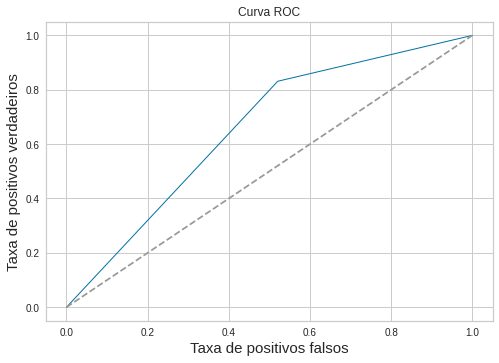

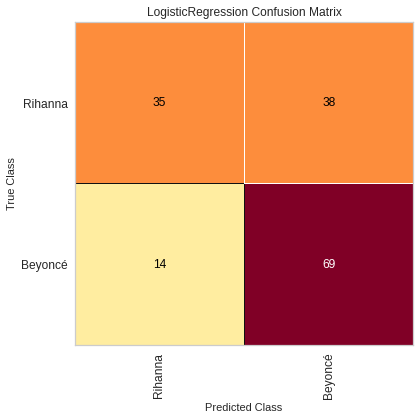

=====SGDClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.67      0.55      0.60        73
     Beyoncé       0.66      0.76      0.70        83

    accuracy                           0.66       156
   macro avg       0.66      0.65      0.65       156
weighted avg       0.66      0.66      0.66       156



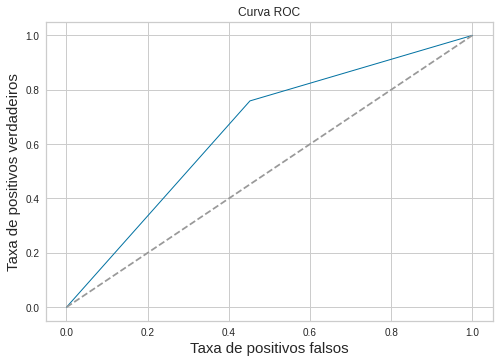

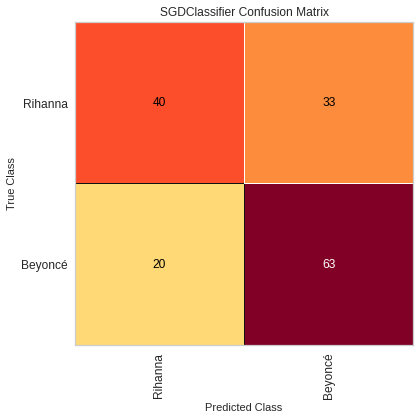

=====RidgeClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.71      0.58      0.64        73
     Beyoncé       0.68      0.80      0.73        83

    accuracy                           0.69       156
   macro avg       0.70      0.69      0.68       156
weighted avg       0.70      0.69      0.69       156



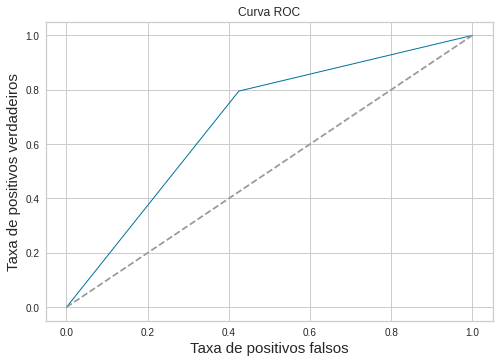

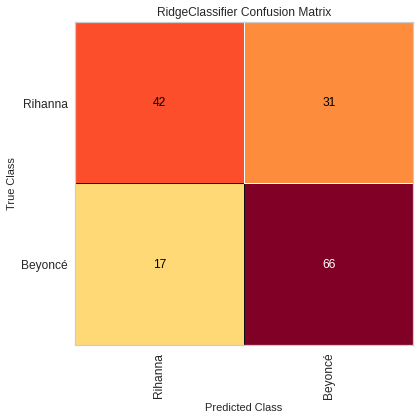

=====KNeighborsClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.57      0.51      0.54        73
     Beyoncé       0.60      0.66      0.63        83

    accuracy                           0.59       156
   macro avg       0.59      0.58      0.58       156
weighted avg       0.59      0.59      0.59       156



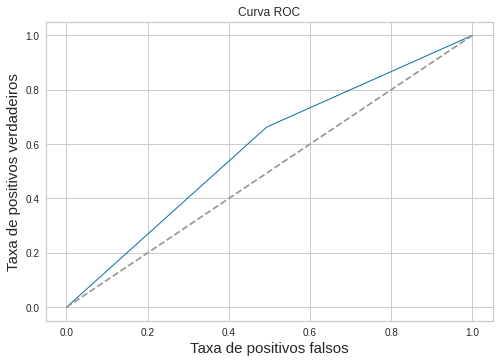

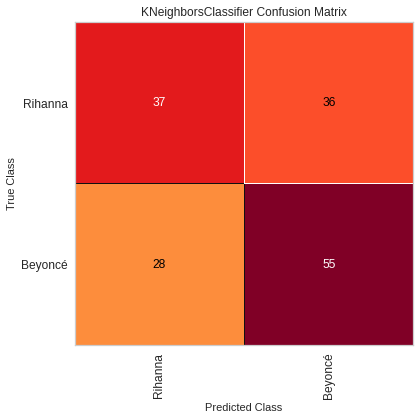

=====MultinomialNB default=====
              precision    recall  f1-score   support

     Rihanna       0.71      0.41      0.52        73
     Beyoncé       0.62      0.86      0.72        83

    accuracy                           0.65       156
   macro avg       0.67      0.63      0.62       156
weighted avg       0.67      0.65      0.63       156



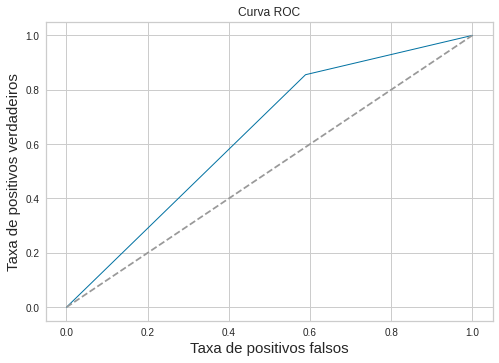

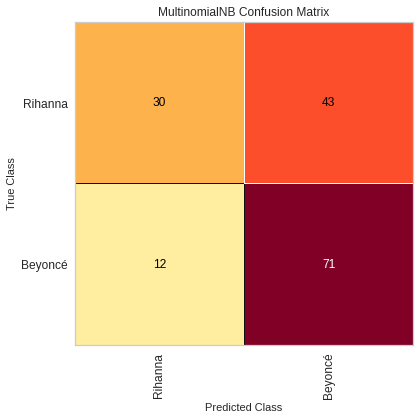

=====SVC default=====
              precision    recall  f1-score   support

     Rihanna       0.68      0.36      0.47        73
     Beyoncé       0.60      0.86      0.71        83

    accuracy                           0.62       156
   macro avg       0.64      0.61      0.59       156
weighted avg       0.64      0.62      0.60       156



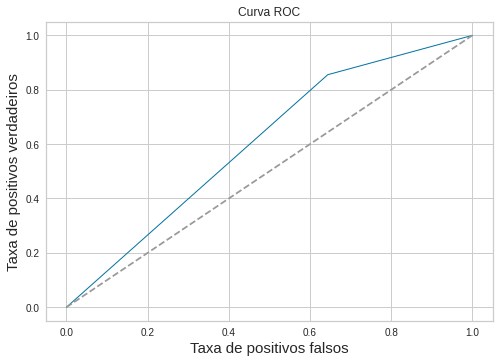

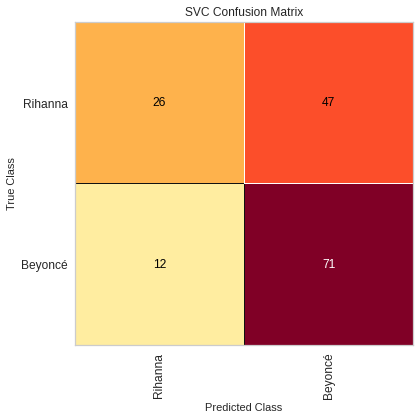

=====RandomForestClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.73      0.52      0.61        73
     Beyoncé       0.66      0.83      0.74        83

    accuracy                           0.69       156
   macro avg       0.70      0.68      0.67       156
weighted avg       0.69      0.69      0.68       156



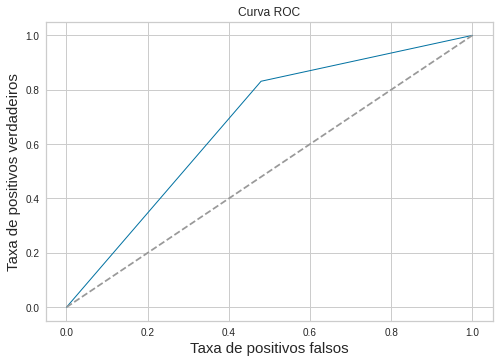

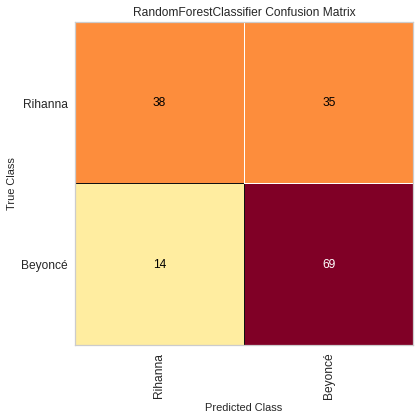

=====GradientBoostingClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.74      0.47      0.57        73
     Beyoncé       0.65      0.86      0.74        83

    accuracy                           0.67       156
   macro avg       0.69      0.66      0.65       156
weighted avg       0.69      0.67      0.66       156



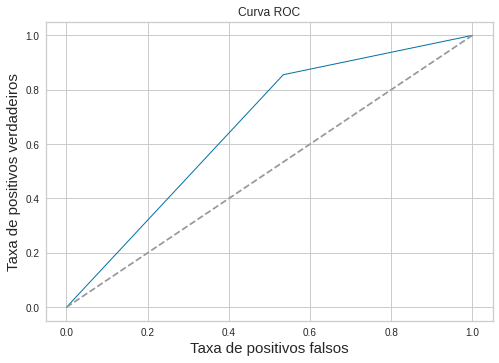

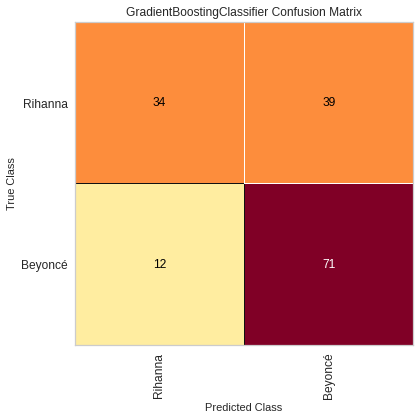

=====BaggingClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.67      0.49      0.57        73
     Beyoncé       0.64      0.78      0.70        83

    accuracy                           0.65       156
   macro avg       0.65      0.64      0.63       156
weighted avg       0.65      0.65      0.64       156



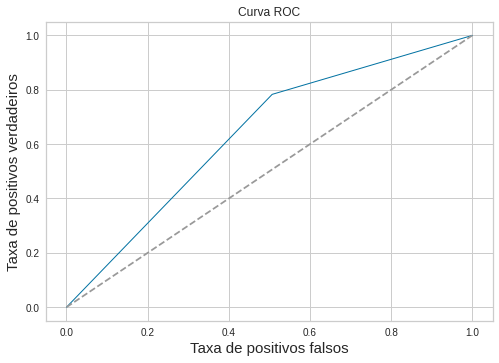

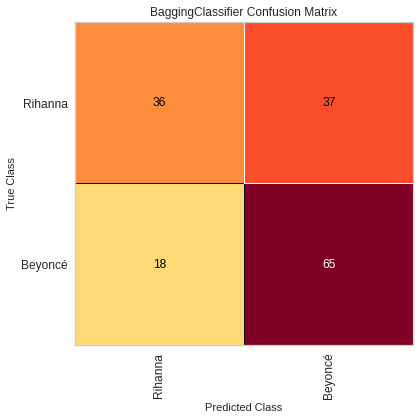

=====ExtraTreesClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.74      0.53      0.62        73
     Beyoncé       0.67      0.83      0.74        83

    accuracy                           0.69       156
   macro avg       0.70      0.68      0.68       156
weighted avg       0.70      0.69      0.68       156



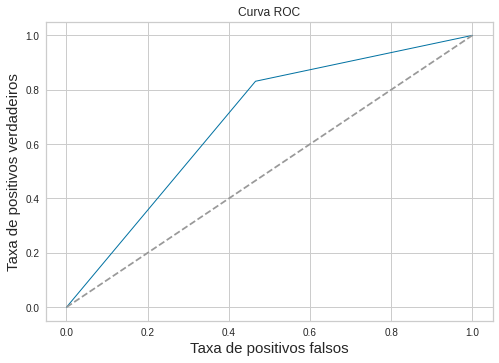

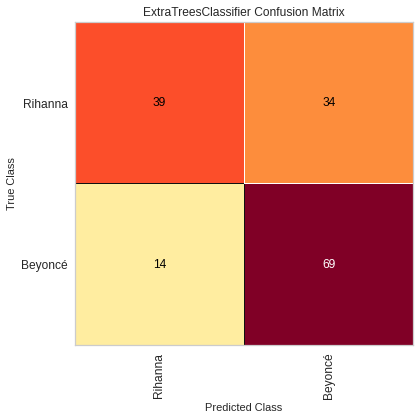

=====AdaBoostClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.67      0.51      0.58        73
     Beyoncé       0.64      0.78      0.71        83

    accuracy                           0.65       156
   macro avg       0.66      0.64      0.64       156
weighted avg       0.66      0.65      0.65       156



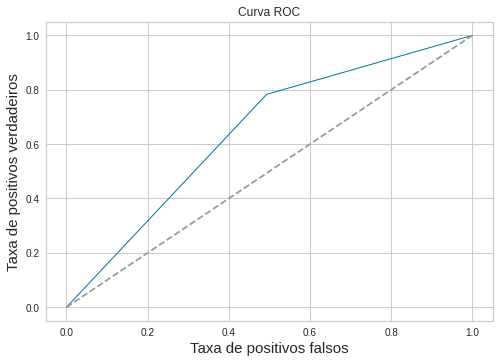

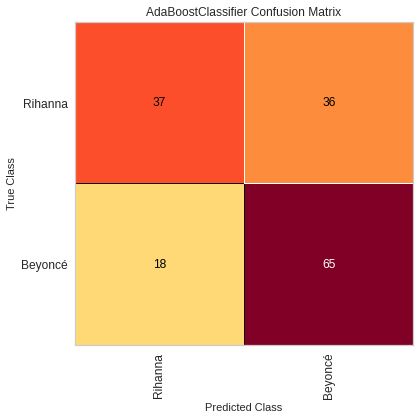

=====XGBClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.71      0.55      0.62        73
     Beyoncé       0.67      0.81      0.73        83

    accuracy                           0.69       156
   macro avg       0.69      0.68      0.68       156
weighted avg       0.69      0.69      0.68       156



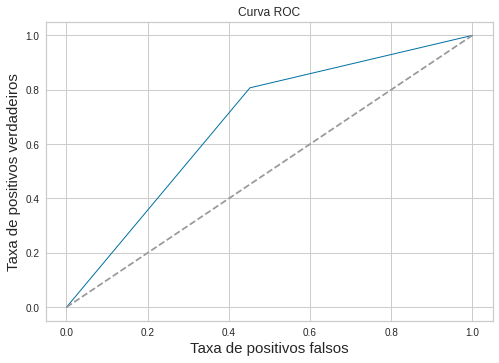

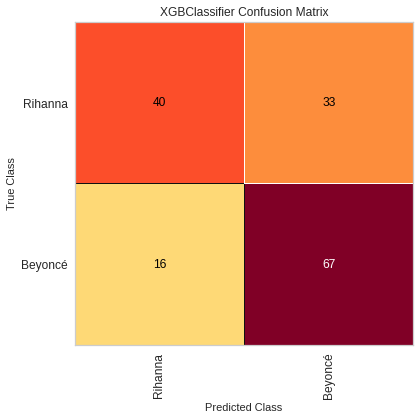

=====MLPClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.71      0.62      0.66        73
     Beyoncé       0.70      0.78      0.74        83

    accuracy                           0.71       156
   macro avg       0.71      0.70      0.70       156
weighted avg       0.71      0.71      0.70       156



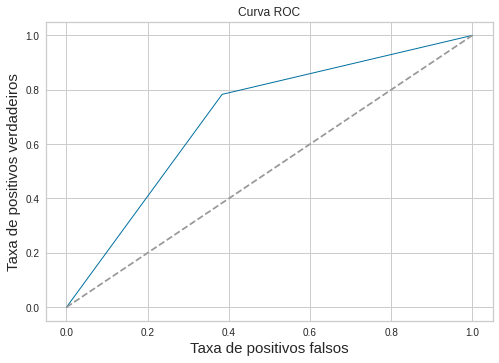

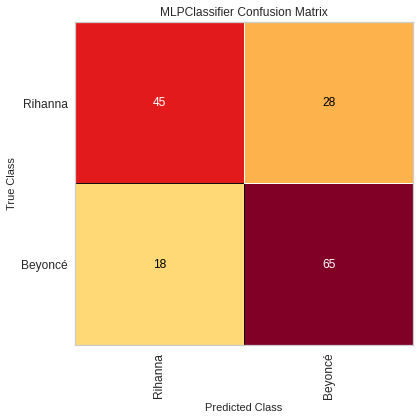

Máximo === accuracy


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
6,RandomForestClassifier,0.675937,0.706553,0.0639887,0.697914,0.0501619,0.792054,0.0590329,0.726402,0.0539618


Máximo === precision


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
12,MLPClassifier,0.699785,0.683364,0.0200993,0.703193,0.0231523,0.682492,0.0244306,0.70221,0.0145518


Máximo === recall


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
5,SVC,0.605793,0.662173,0.0233765,0.629744,0.018251,0.879596,0.0142621,0.733834,0.0145377


Máximo === f1


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
9,ExtraTreesClassifier,0.682786,0.696994,0.054138,0.678655,0.0709109,0.770034,0.0275008,0.744472,0.0281096


====Resumo de Métricas (cross_val_score)====


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
0,LogisticRegression,0.655389,0.683327,0.037807,0.661216,0.0377481,0.832121,0.0266667,0.736022,0.0244882
1,SGDClassifier,0.653491,0.671733,0.0306918,0.677283,0.0620497,0.686465,0.14738,0.670978,0.049499
2,RidgeClassifier,0.685262,0.671826,0.0441651,0.668174,0.0421976,0.759192,0.0541233,0.709708,0.0398619
3,KNeighborsClassifier,0.584750,0.594567,0.0419212,0.606549,0.0354121,0.671448,0.0816373,0.634717,0.0474915
4,MultinomialNB,0.633190,0.689115,0.0406462,0.66341,0.042946,0.85037,0.0266701,0.744011,0.0234532
5,SVC,0.605793,0.662173,0.0233765,0.629744,0.018251,0.879596,0.0142621,0.733834,0.0145377
6,RandomForestClassifier,0.675937,0.706553,0.0639887,0.697914,0.0501619,0.792054,0.0590329,0.726402,0.0539618
7,GradientBoostingClassifier,0.660588,0.644847,0.0502455,0.635168,0.0422437,0.766734,0.0571472,0.695309,0.0407179
8,BaggingClassifier,0.638142,0.637173,0.0514564,0.655449,0.0339659,0.682492,0.108186,0.704057,0.0277572
9,ExtraTreesClassifier,0.682786,0.696994,0.054138,0.678655,0.0709109,0.770034,0.0275008,0.744472,0.0281096


In [43]:
comparar_modelos(models, X_tfidfv, X_train,X_test, y, y_train, y_test, scores)

## Preditor Multlabel

### Importação dos dados

In [44]:
lista_de_artistas = list(df_nlp.artista.unique())
lista_de_artistas

['Beyoncé', 'Rihanna']

In [45]:
def nova_coluna(lista_artistas, dataframe, nome_artista):
    for artista in lista_artistas:
        coluna = []
        for linha_artista in dataframe[nome_artista]:
            if artista in linha_artista:
                coluna.append(1)
            else:
                coluna.append(0)
        dataframe[artista] = coluna

In [46]:
nova_coluna(lista_de_artistas,df_nlp,"artista")
df_nlp.sample(20)

,letra,artista,target,Beyoncé,Rihanna
287,[Rick Ross] Rick Rozay Rihanna Rich forever St...,Rihanna,0,0,1
54,[Intro - Jay Z] Yes! It's so crazy right now! ...,Beyoncé,1,1,0
363,"[Intro] I got the hotness (hotness, hotness, h...",Rihanna,0,0,1
310,I came fluttering in from Neverland Time can n...,Rihanna,0,0,1
361,This whiskey got me feelin' pretty So pardon i...,Rihanna,0,0,1
90,"Okay, ladies, now let's get in formation Okay,...",Beyoncé,1,1,0
190,Ring the alarm I been through this too long Bu...,Beyoncé,1,1,0
272,"You Changed (Feat. Beyoncé, Michelle Williams)...",Beyoncé,1,1,0
107,"I fought for you The hardest, it made me the s...",Beyoncé,1,1,0
183,Looking for a job in the city Working for the ...,Beyoncé,1,1,0


In [47]:
lista_zip_artistas = list(zip(df_nlp[lista_de_artistas[0]],
                     df_nlp[lista_de_artistas[1]]))

df_nlp["todos_artistas"] = lista_zip_artistas
df_nlp.sample(10)

,letra,artista,target,Beyoncé,Rihanna,todos_artistas
101,Remember those walls I built Well baby they're...,Beyoncé,1,1,0,"(1, 0)"
496,"[Rihanna] Ooh na na, what's my name Ooh na na,...",Rihanna,0,0,1,"(0, 1)"
78,"It's over and done, But the heartache lives on...",Beyoncé,1,1,0,"(1, 0)"
139,Child of the wilderness Born into emptiness Le...,Beyoncé,1,1,0,"(1, 0)"
29,What goes around comes back around (hey) (4x) ...,Beyoncé,1,1,0,"(1, 0)"
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé,1,1,0,"(1, 0)"
404,You'll always be mine Sing it to the world Alw...,Rihanna,0,0,1,"(0, 1)"
284,"I guess you know I'm bad, bad I got a problem ...",Rihanna,0,0,1,"(0, 1)"
128,"Go shorty, it's beyonce, We gon' party like, i...",Beyoncé,1,1,0,"(1, 0)"
27,"Oh Beyonce, Beyonce Oh Beyonce, Beyonce Mient...",Beyoncé,1,1,0,"(1, 0)"


In [48]:
X_tfidfv = vetorizador_transform(df_nlp.letra,TfidfVectorizer, 4000, 0.85)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_tfidfv,
                                                                    df_nlp.todos_artistas,
                                                                    test_size = 0.3,
                                                                    stratify=df_nlp.todos_artistas,
                                                                    random_state = 123)

y_train_array = np.asarray(list(y_train))
y_test_array = np.asarray(list(y_test))

In [49]:

regressao_logistica = LogisticRegression(solver = 'lbfgs')

In [50]:
def comparar_multlabel(classificador, X_train, y_train_array,X_test, y_test_array):
    if classificador == MLkNN:
        classificador = classificador()
        classificador.fit(X_train, y_train_array)
        resultado = classificador.score(X_test, y_test_array)
        previsao = classificador.predict(X_test)
        hamming_loss_cls = hamming_loss(y_test_array, previsao)
        print("Hamming Loss {0: .2f}".format(hamming_loss_cls))
        print("Resultado {0: .2f}%".format(resultado*100))
    else:
        classificador = classificador(regressao_logistica)
        classificador.fit(X_train, y_train_array)
        resultado = classificador.score(X_test, y_test_array)
        previsao = classificador.predict(X_test)
        hamming_loss_cls = hamming_loss(y_test_array, previsao)
        print("Hamming Loss {0: .2f}".format(hamming_loss_cls))
        print("Resultado {0: .2f}%".format(resultado*100))
    

In [51]:
lista_cls_multilabel = [OneVsRestClassifier,
                        ClassifierChain, 
                        BinaryRelevance,
                       MLkNN]

In [52]:
for cls_mult in lista_cls_multilabel:
    print('===='+cls_mult.__name__+'====')
    comparar_multlabel(cls_mult, X_train, y_train_array,X_test, y_test_array)

====OneVsRestClassifier====
Hamming Loss  0.33
Resultado  66.67%
====ClassifierChain====
Hamming Loss  0.33
Resultado  66.67%
====BinaryRelevance====
Hamming Loss  0.33
Resultado  66.67%
====MLkNN====
Hamming Loss  0.42
Resultado  57.69%


## Escolha do modelo a ser utilizado

### Treinamento do modelo

In [53]:
X_tfidfv = vetorizador_transform(df_nlp.letra,TfidfVectorizer, 4000, 0.85)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_tfidfv,
                                                                    y,
                                                                    test_size = 0.3,
                                                                    stratify=y,
                                                                    random_state = 123)

In [54]:
cls = MLPClassifier()
cls.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Predição e avaliação

              precision    recall  f1-score   support

     Rihanna       0.70      0.62      0.66        73
     Beyoncé       0.70      0.77      0.73        83

    accuracy                           0.70       156
   macro avg       0.70      0.69      0.69       156
weighted avg       0.70      0.70      0.70       156



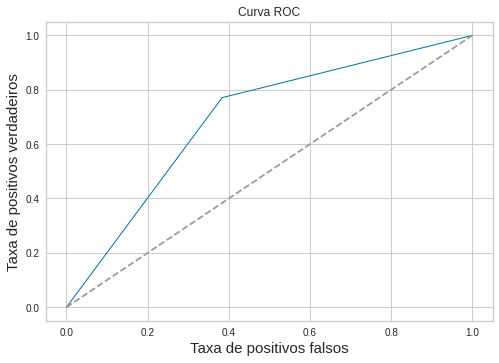

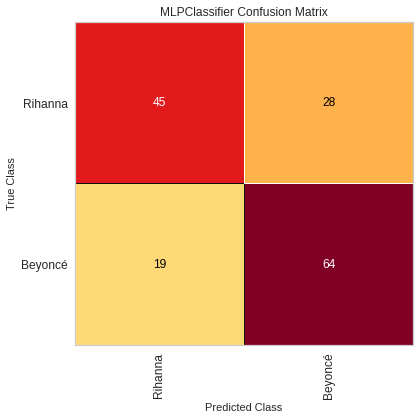

In [55]:
y_predicted = cls.predict(X_test)
roc_auc = roc_auc_score(y_test,y_predicted)

print(classification_report(y_test, y_predicted, target_names=["Rihanna", "Beyoncé"]))

fpr, tpr, thresold = roc_curve(y_test, y_predicted)
plt.plot(fpr, tpr, lw = 1)
plt.plot([0,1],[0,1], '--', color=(0.6, 0.6, 0.6), label="sorte")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("Taxa de positivos falsos", fontsize=15)
plt.ylabel("Taxa de positivos verdadeiros", fontsize=15)
plt.title("Curva ROC", fontsize=12)        

mapping = {0: "Rihanna", 1: "Beyoncé"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(cls, classes=["Rihanna", "Beyoncé"], label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof()

plt.show()

#### Curva de Validação

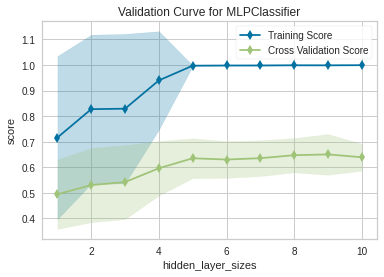

In [56]:
fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
hidden_layer_sizes = np.arange(1,11)
vc_viz = ValidationCurve(cls,param_name="hidden_layer_sizes", scoring="f1_weighted",
                         param_range=hidden_layer_sizes, cv=cv,n_jobs=-1,ax=ax)
vc_viz.fit(X_tfidfv, y)
vc_viz.poof()
plt.show()

#### Curva de Aprendizagem

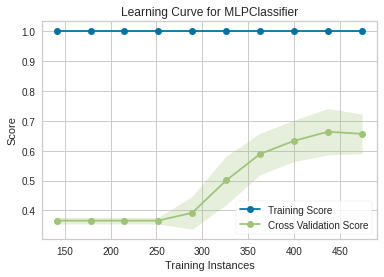

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(cls, cv=cv, train_sizes=sizes, scoring="f1_weighted", n_jobs=-1, ax=ax)
lc_viz.fit(X_tfidfv, y)
lc_viz.poof()
plt.show()

### Salvando modelo treinado

In [58]:
with open('model_nlp.pkl', 'wb') as file:
    pickle.dump(cls, file)
    
print("modelo salvo")

modelo salvo


### Utilizando modelo treinado para realizar previsão

In [108]:
# Carregar modelo
with open('model_nlp.pkl', 'rb') as f:
    model = pickle.load(f)

In [109]:
df_letras_duvidodas = X_tfidfv.copy().head(20)
df_letras_duvidodas.head()

,10,11,16,20,22,2x,3rd,3x,40,45,...,yuh,yup,yé,zac,zone,zoom,zz,ça,única,ɲi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
predicao = cls.predict(df_letras_duvidodas)

In [111]:
df_nlp.iloc[3]

letra             If I ain't got nothing I got you If I ain't go...
artista                                                     Beyoncé
target                                                            1
Beyoncé                                                           1
Rihanna                                                           0
todos_artistas                                               (1, 0)
Name: 3, dtype: object

In [112]:
predicao[3]

1